# MSBA CAPSTONE
"A Data-Driven Approach to Increase Subscription and Retention Rates"

Author:Yuanhong Sun

### Data cleanning 

In [34]:
import pandas as pd
import numpy as np

In [22]:
xlsx = pd.ExcelFile('Newsletter Data Export.xlsx')
mainsheet = pd.read_excel(xlsx, 'LISTER EXPORT')
stripe = pd.read_excel(xlsx, "STRIPE EXPORT")
pnp = pd.read_excel(xlsx, "PNP EXPORT")
group = pd.read_excel(xlsx, "GROUP EXPORT")
mainsheet.head(5)

,Name,Start Date,email,address,city,state,zip,phone,fax,company,sponsor,plan,List Name,Stripe Cust ID,Date Inserted,Date Restored
0,Corey Wood :Edit,2022-02-20 09:12:35,cwood@bpflegal.com,34 Pearl St.,Essex Junction,Vermont,5452,206-679-2061,NaN,NaN,NaN,NaN,"ecl,notw,ebr,app,cp",NaN,NaT,NaT
1,Gian Brosco :Edit,2022-02-17 22:26:53,gian.brosco@nevadacf.org,1980 Festival Plaza Drive #300,LAS VEGAS,Nevada,89135,17025747300,NaN,Nevada Community Foundation Inc.,NaN,NaN,cp,NaN,NaT,NaT
2,Manni Julka :Edit,2022-02-17 15:09:23,maneesh_julka@yahoo.com,2 greenbriar court,Voorhees,New Jersey,8043,858666545,NaN,PSD,NaN,NaN,"ecl,notw,ebr,be,fie,app,cp,itp,ip,fpp",NaN,NaT,NaT
3,leslie heffernen :Edit,2022-02-16 13:43:39,l.heffernen@pitcairn.com,"165 Township Line Road, Suite 3000",Jenkintown,Pennsylvania,19046,6105748841,NaN,Pitcairn Trust Co,NaN,NaN,"ecl,notw,ebr,be,fie,app,cp,itp,ip,fpp",NaN,NaT,NaT
4,Jinhee Bae :Edit,2022-02-15 10:23:00,jbae@powerlawfirm.com,433 Hackensack Ave. 1st FL,Hackensack,New Jersey,7601,8002811515,NaN,Power Law Firm LLP,NaN,NaN,"ecl,notw,app,cp,itp,ip,fpp,ebr,be,fie",cus_M423LkkkLgYfl1,2022-09-15 01:58:22.440,NaT


In [50]:
grplist = ["name","city","state","zip","sponsor","company","listname",]
group[grplist].dropna()

,name,city,state,zip,sponsor,company,listname
3,Robin Tutt,Minneapolis,MN,55402,Fox Rothschild LLP,Fox Rothschild LLP,"fie,be,ebr,notw,app,cp,ecl,Digest,ttn"
4,Benjamin Millard,New York,NY,10036,Schiff Hardin,Schiff Hardin,"fie,be,ebr,notw,app,cp,ecl,Digest,ttn"
5,Elizabeth Faist,Atlanta,GA,30303,Djuric Spratt,Djuric Spratt,"fie,be,ebr,notw,app,cp,ecl,Digest,ttn"
6,Christa Boyd,Atlanta,GA,30303,Djuric Spratt,Djuric Spratt,"fie,be,ebr,notw,app,cp,ecl,Digest,ttn"
7,Kathy Wunderli,Los Angeles,CA,90067,Willkie Farr & Gallagher LLP,Willkie Farr & Gallagher LLP,"fie,be,ebr,notw,app,cp,ecl,Digest"
...,...,...,...,...,...,...,...
3215,Sam Gorski,Pittsburgh,PA,15222-2613,K&L Gates,K&L Gates,"digest,ecl,notw,app,cp,itp,ip,fpp,ttn,scl,ebr,..."
3225,Michael Moritz,New York,NY,10019,Paul Weiss,Paul Weiss,"fie,be,ebr,notw,app,cp,ecl,itp,ip,fpp,scl,ttn,..."
3301,L. Alyson Graham,GAINESVILLE,GA,30501,Willis Investment Counsel,Willis Investment Counsel,"fie,be,ebr,notw,app,cp,ecl,itp,ip,fpp,scl,ttn,..."
3341,Kathy Skinner,San Rafael,CA,94901,White & Case,White & Case LLP,"scl,ttn,fpp,ip,itp,cp,app,fie,be,ebr,notw,ecl,..."


In [27]:
# Merge DataFrames by stripe customer id
df = pd.merge(stripe,mainsheet, left_on='id', right_on='Stripe Cust ID', how='left')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5640 entries, 0 to 5639
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    5640 non-null   object        
 1   Description           4 non-null      object        
 2   Email                 3621 non-null   object        
 3   Name_x                5640 non-null   object        
 4   Created (UTC)         5640 non-null   datetime64[ns]
 5   Delinquent            5640 non-null   bool          
 6   Plan                  884 non-null    object        
 7   Status                884 non-null    object        
 8   Cancel At Period End  884 non-null    float64       
 9   Account Balance       1108 non-null   float64       
 10  Currency              1108 non-null   object        
 11  Total Spend           5640 non-null   float64       
 12  Payment Count         5640 non-null   int64         
 13  Average Order     

In [28]:
#select the valuable factors
valuelist = ["Name","Status","city","state","zip","company","List Name"]
df = df[valuelist]
df = df.dropna(subset=['company'])
df.head(10)

,id,Name_x,Status,city,state,zip,company,List Name
8,cus_NJ7UIyzgcPNhTv,Martin Smith,active,Boston,MA,NaN,John Hancock,"fie,be,ebr,notw,app,cp,ecl,digest,itp,ip,fpp,p..."
21,cus_NEkLqczDif3wRw,Joshua Miller,active,Boston,Massachusetts,2108,"Acadia Management Company, Inc.","digest,fie"
166,cus_MjYVy1K9IPqEfT,James Provenza PC,active,Glenview,IL,60025,"James C Provenza, PC","digest,ecl,notw,app,cp,itp,ip,scl,textonly,ebr,be"
185,cus_MdxnpN4Zc12NI4,Kathy Skinner,active,San Rafael,CA,94901,White & Case LLP,"scl,ttn,fpp,ip,itp,cp,app,fie,be,ebr,notw,ecl,..."
213,cus_MY06aLc74zBciP,Justin Gilbert,active,Franklin,Tennessee,37067,Music City Estate Law,"ecl,notw,ebr,be,fie,app,cp,itp,ip,fpp,ttn"
263,cus_MLEWgv6lQA1OS3,Kathy Skinner,NaN,San Rafael,CA,94901,White & Case LLP,"ecl,notw,ebr,be,fie,app,cp,itp,ip,fpp,ttn,scl,..."
272,cus_MIwrpQMo8QASXb,William D. (Bill) Pargaman,NaN,Austin,TX,78759-8962,Brink Bennett Pargaman Atkins + Sanchez PLLC,"fie,be,ebr,notw,app,cp,ecl,Digest,ip,fpp,pman,ttn"
275,cus_MIcALuL2Q8uyc5,Tim Meinhart,active,Chicago,IL,60631,Willamette Management Associates,"notw,digest,itp,ip,fpp,pman,ttn"
276,cus_MIbnI0uGMMEzFb,Kathy Skinner,active,San Rafael,CA,10020,White & Case LLP,"ecl,notw,ebr,be,fie,app,cp,itp,ip,fpp,ttn,scl,..."
332,cus_M5WDxx8oDoPpAC,Lawrence J Groskin,active,TUXEDO PARK,NY,10987,"Lawrence J. Groskin, J.D., CPA","ecl,notw,ebr,be,fie,app,cp,itp,ip,fpp,digest,ttn"


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491 entries, 8 to 5605
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         491 non-null    object
 1   Name_x     491 non-null    object
 2   Status     386 non-null    object
 3   city       486 non-null    object
 4   state      484 non-null    object
 5   zip        482 non-null    object
 6   company    491 non-null    object
 7   List Name  490 non-null    object
dtypes: object(8)
memory usage: 34.5+ KB


In [30]:
#New dataset output
#df.to_excel("cleaned_data.xlsx")

###  NLP Model building

In [35]:
import spacy
from collections import OrderedDict
from spacy.lang.en.stop_words import STOP_WORDS

In [176]:
class TextRank4Keyword():
    """Extract keywords from text"""
    
    def __init__(self):
        self.d = 0.85 # default damping coefficient, standing for the possibility that keep in looking through current webpage
        self.min_diff = 1e-5 # convergence threshold
        self.steps = 10 # iteration steps 
        self.node_weight = None # save keywords and its weight

    
    def set_stopwords(self, stopwords): # stopwords are the words like a, the, my, your, his, her, etc.
        """Set stop words"""
        for word in STOP_WORDS.union(set(stopwords)):
            lexeme = nlp.vocab[word]
            lexeme.is_stop = True
    
    def sentence_segment(self, doc, candidate_pos, lower): # divide the whole paragraph into sentences
        """Store those words only in cadidate_pos"""
        sentences = []
        for sent in doc.sents:
            selected_words = []
            for token in sent:
                # Store words only with cadidate POS tag
                if token.pos_ in candidate_pos and token.is_stop is False:
                    if lower is True:
                        selected_words.append(token.text.lower())
                    else:
                        selected_words.append(token.text)
            sentences.append(selected_words)
        return sentences
        
    def get_vocab(self, sentences):
        """Get all tokens"""
        vocab = OrderedDict()
        i = 0
        for sentence in sentences:
            for word in sentence:
                if word not in vocab:
                    vocab[word] = i
                    i += 1
        return vocab
    
    def get_token_pairs(self, window_size, sentences):
        """Build token_pairs from windows in sentences"""
        token_pairs = list()
        for sentence in sentences:
            for i, word in enumerate(sentence):
                for j in range(i+1, i+window_size):
                    if j >= len(sentence):
                        break
                    pair = (word, sentence[j])
                    if pair not in token_pairs:
                        token_pairs.append(pair)
        return token_pairs
        
    def symmetrize(self, a):
        return a + a.T - np.diag(a.diagonal())
    
    def get_matrix(self, vocab, token_pairs):
        """Get normalized matrix"""
        # Build matrix
        vocab_size = len(vocab)
        g = np.zeros((vocab_size, vocab_size), dtype='float')
        for word1, word2 in token_pairs:
            i, j = vocab[word1], vocab[word2]
            g[i][j] = 1
            
        # Get Symmeric matrix
        g = self.symmetrize(g)
        
        # Normalize matrix by column
        norm = np.sum(g, axis=0)
        g_norm = np.divide(g, norm, where=norm!=0) # this is ignore the 0 element in norm
        
        return g_norm

    
    def get_keywords(self, number = 10):
        """Print top number keywords"""
        node_weight = OrderedDict(sorted(self.node_weight.items(), key=lambda t: t[1], reverse=True))
        keywords = []
        for i, (key, value) in enumerate(node_weight.items()):
            keywords.append(key)
            #print(key)
            if i > number:
                break
        return keywords
        
    def analyze(self, text, 
                candidate_pos=['NOUN', 'PROPN'], 
                window_size=4, lower=False, stopwords=list()):
        """Main function to analyze text"""
        
        # Set stop words
        self.set_stopwords(stopwords)
        
        # Pare text by spaCy
        doc = nlp(text)
        
        # Filter sentences
        sentences = self.sentence_segment(doc, candidate_pos, lower) # list of list of words
        
        # Build vocabulary
        vocab = self.get_vocab(sentences)
        
        # Get token_pairs from windows
        token_pairs = self.get_token_pairs(window_size, sentences)
        
        # Get normalized matrix
        g = self.get_matrix(vocab, token_pairs)
        
        # Initionlization for weight(pagerank value)
        pr = np.array([1] * len(vocab))
        
        # Iteration
        previous_pr = 0
        for epoch in range(self.steps):
            pr = (1-self.d) + self.d * np.dot(g, pr)
            if abs(previous_pr - sum(pr))  < self.min_diff:
                break
            else:
                previous_pr = sum(pr)

        # Get weight for each node
        node_weight = dict()
        for word, index in vocab.items():
            node_weight[word] = pr[index]
        
        self.node_weight = node_weight

In [177]:
nlp = spacy.load('en_core_web_sm')
text = '''
Qualified retirement plans may offer life insurance as an investment option, and there are a number of creative planning applications. This newsletter reviews ten planning opportunities with life insurance in qualified retirement plans that all advisors should have in their quiver.”

 

Michael Geeraerts and Jim Magner provide members with commentary on life insurance in qualified retirement plans.

 

Michael Geeraerts, CPA, JD, CLU®, NQPATM is an Advanced Markets attorney at Equitable Financial Life Insurance Company.[1] Prior to joining Equitable, Michael was an Advanced Markets attorney at The Guardian Life Insurance Company of America. Prior to Guardian, Michael was a manager at PricewaterhouseCoopers LLP and a tax consultant at KPMG LLP.

 

Jim Magner is an advanced planning attorney at The Guardian Life Insurance Company of America®.[2]  Jim previously worked as an attorney advisor in the IRS’s Office of Chief Counsel in Washington, D.C., where he wrote private and public rulings on estate, gift, GST and charitable remainder trust issues.

 

Here is their commentary:

 

EXECUTIVE SUMMARY:

 

Qualified retirement plans may offer life insurance as an investment option and a way to provide death benefits under the plan. One benefit is that plan contributions are tax deductible. Another benefit is that the death benefit in excess of the cash surrender value is still income tax free to the plan beneficiary as long as the plan participant includes the economic benefit in his taxable income. The economic benefit can be calculated using IRS Table 2001 or a company’s published qualifying annual term rates.

 

Life insurance offered under a qualified plan must follow certain requirements as the tax code only allows plans to provide incidental benefits other than retirement benefits. For defined contribution plans, there is the percentage limitation test, which provides that insurance is incidental if the cumulative premiums do not exceed a specified threshold of the aggregate employer contributions allocated to the participant. The threshold varies based on the type of life insurance:

 

·      For whole life insurance, the total premium must be less than 50% of the aggregate employer contributions.

·      For insurance other than whole life (e.g., universal life), the total premium must be less than 25% of the aggregate employer contributions.

·      For a combination of whole life and other life insurance, the entire premium of the non-whole life insurance plus one-half of the premium of whole life insurance must be under 25% of the aggregate employer contributions.

 

The incidental life insurance limit does not apply if the plan sponsor of a defined contribution plan uses seasoned contributions to purchase life insurance.

 

For defined benefit plans, testing if life insurance benefits are incidental can be done by one of two methods:

 

·      Based on the percentage of the contributions, which provides that up to 2/3 of the theoretical contribution can be used for whole life insurance premiums or 1/3 for universal life insurance premiums.

·      Based on the 100 times method, which provides that the life insurance benefit provided, without regard to premium, cannot be more than 100 times the anticipated monthly annuity benefit.

 

Also, for life insurance to be considered incidental, a plan may not continue to hold life insurance on a participant after retirement. At a participant’s retirement, a plan holding a life insurance policy must require the trustee to convert the entire value of a life insurance contract into cash or provide periodic income and/or for a sale or distribution of the contract to the participant so that no portion of the policy is held in plan beyond retirement.
'''

tr4w = TextRank4Keyword()
tr4w.analyze(text, candidate_pos = ['NOUN', 'PROPN'], window_size=4, lower=False)
tr4w.get_keywords(10)

['insurance',
 'life',
 'plan',
 'benefit',
 'tax',
 'plans',
 'retirement',
 'attorney',
 'Michael',
 'contributions',
 'planning',
 'IRS']

### Clustering

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
# requires: conda install -c conda-forge scikit-plot
import scikitplot as skplt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

In [154]:
df = pd.read_excel("cleaned_data.xlsx")
df = df.dropna()
df.head(5)

,Unnamed: 0,id,Name_x,Status,city,state,zip,company,First Industry,Second Industry
1,21.0,cus_NEkLqczDif3wRw,Joshua Miller,active,Boston,Massachusetts,2108,"Acadia Management Company, Inc.",Investment,Investment Management
2,166.0,cus_MjYVy1K9IPqEfT,James Provenza PC,active,Glenview,IL,60025,"James C Provenza, PC",Legal Services,Attorneys
3,185.0,cus_MdxnpN4Zc12NI4,Kathy Skinner,active,San Rafael,CA,94901,White & Case LLP,Legal Services,Attorneys
4,213.0,cus_MY06aLc74zBciP,Justin Gilbert,active,Franklin,Tennessee,37067,Music City Estate Law,Legal Services,Attorneys
7,275.0,cus_MIcALuL2Q8uyc5,Tim Meinhart,active,Chicago,IL,60631,Willamette Management Associates,Finance,Consulting Services


In [155]:
vectorizer = TfidfVectorizer(stop_words='english')
df['combined_text'] = df['city'].astype(str) + ' ' + df['state'].astype(str) + ' ' + df['company'].astype(str) + ' ' + df['First Industry '].astype(str) + ' ' + df['Second Industry'].astype(str)
# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['combined_text'])
# Compute cosine similarity between documents
cos_sim = cosine_similarity(X)
# Cluster the data using K-Means algorithm
kmeans = KMeans(n_clusters=10, random_state=886).fit(cos_sim)
# Add cluster labels to the dataframe
df['cluster_label'] = kmeans.labels_
# Print the number of items in each cluster
print(df['cluster_label'].value_counts())

0    115
3     54
2     45
8     39
1     33
7     27
9     20
4     16
6     10
5      7
Name: cluster_label, dtype: int64


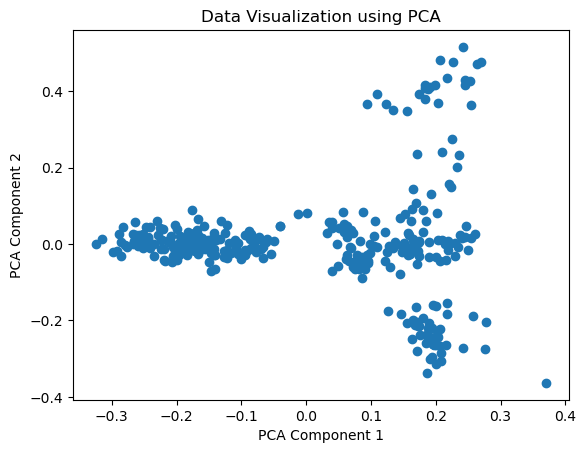

In [156]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X.toarray())
# Plot the data points in 2D space
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Data Visualization using PCA')
plt.show()

In [158]:
print(df['cluster_label'].value_counts())

1    174
4     73
3     47
2     45
0     27
Name: cluster_label, dtype: int64


### Matching up 

In [207]:
def extract_keywords(newsletter):
    tr4w = TextRank4Keyword()
    tr4w.analyze(newsletter, candidate_pos = ['NOUN', 'PROPN'], window_size=4, lower=False)
    return tr4w.get_keywords(30)

In [167]:
newsletters = pd.DataFrame({
    'newsletter_id': [1, 2, 3],
    'content': ['Traditionally, the owner of a permanent life insurance policy had one choice when he or she needed money for a health situation—surrender the policy and receive the cash value. More than 30 years ago, some third-party companies began to offer the owners of policies on terminally ill insureds the ability to viaticate the policy. In such cases, the viatical settlement company would make an offer to the owner to purchase the policy for a substantial percentage of the policy’s death benefit.As the market for viatical settlements developed, variations appeared. Viatical settlement companies began to change into life settlement companies—offering to buy policies not only when the insured was in a terminal condition but also when the insured was chronically ill or otherwise impaired. Life carriers likewise began to offer accelerated benefit options, effectively allowing policyowners early access to the death benefit when the insured was determined to be terminally ill or chronically ill.  Congress and the president got involved with clearing up the tax treatment of certain kinds of accelerations for chronic and terminal illness when they enacted Revenue Code Section 101(g), effective in 1997. Those new provisions effectively put the federal seal of approval on life policy accelerations. The newsletter discusses some of the tax and practical issues related to life policy accelerations. Not every life insurance company offers an acceleration feature for chronic or terminal illness. Some opt for stand-alone long-term care insurance riders instead of allowing a chronically ill insured policyowner to access the death benefit early. In this newsletter, we will not discuss stand-alone riders but will focus on the kinds of death benefit accelerations described in Section 101(g)', 
                'In re James M. Kurtz Protection Trust[i] reminds practitioners of the need for careful drafting and consideration of grantor intention when administering and interpreting a joint trust, as well as when considering the fiduciary duties that may be owed by the surviving grantor/trustee. Barbara and James Kurtz (“grantors”) created a joint trust in February 1995, known as the JMK Trust (the “Joint Trust”). Grantors each had children from prior marriages. They created the Joint Trust to provide for themselves during their lifetimes. The Joint Trust also provided for their respective children, in equal shares, following the death of both grantors. While the Joint Trust became irrevocable on the first grantor’s death, it reflected that following the death of the first grantor, the trust’s assets would be held “for the use and benefit of the surviving grantor” and that the trustee must pay as much of the trust’s assets “to the surviving grantor as the surviving grantor may request”. Barbara and James were the initial co-trustees. Barbara died in August 2010. Following Barbara’s death, James continued to act as trustee without the requirement of a co-successor trustee. Shortly after Barbara’s death, James began making changes to the plan he and Barbara had jointly created.  He established a new trust known as the James M. Kurtz Protection Trust (the “Protection Trust”). Ultimately, the Protection Trust named his son as the residuary beneficiary and eliminated James’ daughter and Barbara’s children as beneficiaries. James also amended and restated the then irrevocable Joint Trust (the “amendment”) such that upon his death any remaining assets would pour over to the Protection Trust and, therefore, only benefit his son (again eliminating his daughter and Barbara’s children as beneficiaries). In addition, he distributed certain real property owned by the Joint Trust to himself and then conveyed that property to the Protection Trust.  That property was later sold for $410,000.  James also purchased hunting property in the name of the Joint Trust.', 
                'It is the duty of a tax professional to advise and educate clients so that clients can make informed and intelligent decisions.  We believe that reasonable professionals, courts, and appellate courts can disagree on the question of whether there is a step-up in basis on the death of the grantor for assets that are not included in the Grantor’s gross estate for estate tax purposes but are owned by the Grantor for income tax purposes.  Eventually this issue will be decided by the courts.  Until then, advisors are taking some degree of risk if they tell clients that there is no adjustment in basis on the death of the grantor.  Courts may determine that there is a basis adjustment based on our analysis below. A Revenue Ruling is binding on the IRS and can be relied upon by any taxpayer, but a Revenue Ruling does not have the same impact as a law or a Tax Court or appellate decision. Revenue Rulings are not binding on any federal court, including the Tax Court.[i]  While most courts give deference to Revenue Rulings, the Tax Court does not give particular weight to Revenue Rulings because they are considered to represent the arguments of one of the parties before the court.[ii] Our analysis in the Comment section was largely prepared before the IRS issued a Revenue Ruling on this issue.  Now that Revenue Ruling 2023-2 has been issued, we do not believe that the IRS’s position is beyond question.  Although there is the risk of penalty, a taxpayer might consider paying the capital gains tax on the tax return as if the assets did not receive an adjustment in basis, and then filing an amended tax return requesting a refund based on the assets receiving a step-up in basis, and providing full disclosure that this position was taken.  Then, if the step-up in basis is denied, the taxpayer did not make a substantial underpayment on the original return, and the risk of penalties being incurred by the taxpayer should be greatly reduced. There will doubtlessly be many other newsletters that describe what the ruling says and argue that there is no adjustment in basis for these assets in this situation. In our opinion, there will likely be too few articles on why there should be an adjustment in basis on the death of the grantor.']
})

In [223]:
Insurance = pd.read_excel("Insurance.xlsx")
LegalService = pd.read_excel("Legal Service.xlsx")
Investment = pd.read_excel("Investment & Wealth Management.xlsx")
RealEstate = pd.read_excel("Real Estate.xlsx")
TaxAccounting = pd.read_excel("Tax&Accounting.xlsx")
Consulting = pd.read_excel("Consulting.xlsx")

In [224]:
industry_keywords = {
    'Insurance': Insurance['Words'].to_list(),
    'LegalService': LegalService['Words'].to_list(),
    'Investment': Investment['Words'].to_list(),
    'RealEstate': RealEstate['Words'].to_list(),
    'Tax&Accounting': TaxAccounting['Words'].to_list(),
    'Consulting':Consulting['Words'].to_list()
}

In [208]:
keyword = []
for i in range(len(newsletters)):
    keyword.append(extract_keywords(newsletters['content'][i]))
newsletters['keywords'] = keyword
newsletters

,newsletter_id,content,keywords
0,1,"Traditionally, the owner of a permanent life i...","[policy, life, benefit, accelerations, insuran..."
1,2,In re James M. Kurtz Protection Trust[i] remin...,"[Trust, James, grantor, Barbara, trust, death,..."
2,3,It is the duty of a tax professional to advise...,"[basis, Revenue, tax, adjustment, taxpayer, as..."


In [221]:
df['First Industry '].value_counts()

Legal Services    175
Finance           148
Investment         23
Other               8
Real Estate         7
Consumption         3
Media               1
Healthcare          1
Name: First Industry , dtype: int64

In [222]:
df['Second Industry'].value_counts()

Legal Services                         118
Consulting Services                     69
Accounting and Tax Services             46
Financial Services                      39
Attorneys                               23
Wealth Management                       15
Insurance                               14
Investment Management                    7
Real Estate Services                     5
Nonclassifiable Establishments           4
Banking                                  4
Investment management                    4
Trust Service                            3
Investment Services                      3
Religious Organizations                  1
Healthcare                               1
N.J. Grella & Associates                 1
Financial Education and Training         1
Wine                                     1
Commercial and Industrial Rental         1
Grocery Wholesale                        1
Publishing                               1
Civil Engineering                        1
Miscellaneo

In [239]:
df = df.reset_index()[['id', 'Name_x', 'Status', 'city', 'state', 'zip',
       'company', 'First Industry ', 'Second Industry', 'combined_text',
       'cluster_label']]
subscribers_keywords = []
for i in range(len(df)):
    if df['First Industry '][i] == 'Legal Services':
        subscribers_keywords.append(LegalService['Words'].to_list())
    elif df['Second Industry'][i] == 'Consulting':
        subscribers_keywords.append(Consulting['Words'].to_list())
    elif df['Second Industry'][i] == 'Accounting and Tax Services':
        subscribers_keywords.append(TaxAccounting['Words'].to_list())
    elif df['First Industry '][i] == 'Investment':
        subscribers_keywords.append(Investment['Words'].to_list())
    elif df['First Industry '][i] == 'Real Estate':
        subscribers_keywords.append(Investment['Words'].to_list())
    elif df['Second Industry'][i] == 'Insurance':
        subscribers_keywords.append(Insurance['Words'].to_list())
    else:
        subscribers_keywords.append(TaxAccounting['Words'].to_list())
df['Subscribers_keywords'] = subscribers_keywords

In [243]:
df.head(3)

,id,Name_x,Status,city,state,zip,company,First Industry,Second Industry,combined_text,cluster_label,Subscribers_keywords
0,cus_NEkLqczDif3wRw,Joshua Miller,active,Boston,Massachusetts,2108,"Acadia Management Company, Inc.",Investment,Investment Management,Boston Massachusetts Acadia Management Company...,0,"[Accredited investor, Active management, Alpha..."
1,cus_MjYVy1K9IPqEfT,James Provenza PC,active,Glenview,IL,60025,"James C Provenza, PC",Legal Services,Attorneys,"Glenview IL James C Provenza, PC Legal Service...",1,"[Abetment, Abrogate, Acquittal, Adjudicate, Ad..."
2,cus_MdxnpN4Zc12NI4,Kathy Skinner,active,San Rafael,CA,94901,White & Case LLP,Legal Services,Attorneys,San Rafael CA White & Case LLP Legal Services ...,1,"[Abetment, Abrogate, Acquittal, Adjudicate, Ad..."


In [259]:
newsletters

,newsletter_id,content,keywords
0,1,"Traditionally, the owner of a permanent life i...","[policy, life, benefit, accelerations, insuran..."
1,2,In re James M. Kurtz Protection Trust[i] remin...,"[Trust, James, grantor, Barbara, trust, death,..."
2,3,It is the duty of a tax professional to advise...,"[basis, Revenue, tax, adjustment, taxpayer, as..."


In [ ]:
import gensim.downloader as api
w2v_model = api.load("word2vec-google-news-300")

In [253]:
news = []
for i in range(len(df)):
    simi = []
    for j in range(len(newsletters)):
        set1 = set(df['Subscribers_keywords'][i])
        set2 = set(newsletters['keywords'][j])

        intersection = len(set1.intersection(set2))
        union = len(set1.union(set2))

        similarity = intersection / union
        #similarity = w2v_model.n_similarity(df['Subscribers_keywords'][i], newsletters['keywords'][j])
        simi.append(similarity)
    index = simi.index(max(simi))
    news.append(newsletters['newsletter_id'][index])
df['news_id'] = news
df

,id,Name_x,Status,city,state,zip,company,First Industry,Second Industry,combined_text,cluster_label,Subscribers_keywords,news_id
0,cus_NEkLqczDif3wRw,Joshua Miller,active,Boston,Massachusetts,2108,"Acadia Management Company, Inc.",Investment,Investment Management,Boston Massachusetts Acadia Management Company...,0,"[Accredited investor, Active management, Alpha...",2
1,cus_MjYVy1K9IPqEfT,James Provenza PC,active,Glenview,IL,60025,"James C Provenza, PC",Legal Services,Attorneys,"Glenview IL James C Provenza, PC Legal Service...",1,"[Abetment, Abrogate, Acquittal, Adjudicate, Ad...",1
2,cus_MdxnpN4Zc12NI4,Kathy Skinner,active,San Rafael,CA,94901,White & Case LLP,Legal Services,Attorneys,San Rafael CA White & Case LLP Legal Services ...,1,"[Abetment, Abrogate, Acquittal, Adjudicate, Ad...",1
3,cus_MY06aLc74zBciP,Justin Gilbert,active,Franklin,Tennessee,37067,Music City Estate Law,Legal Services,Attorneys,Franklin Tennessee Music City Estate Law Legal...,1,"[Abetment, Abrogate, Acquittal, Adjudicate, Ad...",1
4,cus_MIcALuL2Q8uyc5,Tim Meinhart,active,Chicago,IL,60631,Willamette Management Associates,Finance,Consulting Services,Chicago IL Willamette Management Associates Fi...,4,"[Accountant, Accounting, Accounting cycle, Acc...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,cus_M423kBANojXYob,Evan G. Mathew,active,Davis,CA,95616,BCJ Financial Group,Investment,Investment Management,Davis CA BCJ Financial Group Investment Invest...,0,"[Accredited investor, Active management, Alpha...",2
362,cus_LS7XK2vllv1ux6,Steven M. Wyatt,active,Atlanta,GA,30080,Chamberlain Hrdlicka,Legal Services,Consulting Services,Atlanta GA Chamberlain Hrdlicka Legal Services...,1,"[Abetment, Abrogate, Acquittal, Adjudicate, Ad...",1
363,cus_LLNGmf6Zt8U8PC,Laura J. Gorretta,active,Chagrin Falls,OH,44022,Gorretta Law,Legal Services,Consulting Services,Chagrin Falls OH Gorretta Law Legal Services C...,1,"[Abetment, Abrogate, Acquittal, Adjudicate, Ad...",1
364,cus_LFpLZWRodt0KT3,Morgan Scott,active,Portland,OR,97209,M Financial,Finance,Accounting and Tax Services,Portland OR M Financial Finance Accounting and...,3,"[Accountant, Accounting, Accounting cycle, Acc...",1


In [271]:
df.loc[df['news_id'] == 1][['Name_x','city','state','company','First Industry ','Second Industry','cluster_label','news_id']][2:13]


,Name_x,city,state,company,First Industry,Second Industry,cluster_label,news_id
3,Justin Gilbert,Franklin,Tennessee,Music City Estate Law,Legal Services,Attorneys,1,1
4,Tim Meinhart,Chicago,IL,Willamette Management Associates,Finance,Consulting Services,4,1
5,Kathy Skinner,San Rafael,CA,White & Case LLP,Legal Services,Legal Services,1,1
6,Lawrence J Groskin,TUXEDO PARK,NY,"Lawrence J. Groskin, J.D., CPA",Legal Services,Legal Services,1,1
7,Karen Spinardi,Merced,CA,Law Office of Karen Spinardi,Legal Services,Attorneys,1,1
8,Michelle B. Robnett,Edmond,OK,"Michelle B. Robnett, PLLC",Legal Services,Attorneys,1,1
9,Peter E. Lippett,Lafayette,CA,Law Offices of Peter Lippett,Legal Services,Attorneys,1,1
10,Steven Calvelli,Morristown,NJ,Capital Enhancement,Finance,Financial Services,2,1
11,Raymond F Dalton Jr,South Elgin,IL,Dalton Law Offices,Legal Services,Legal Services,1,1
12,ierzynski assoc cpa pa,spring hill,FL,kierzynski & assoc cpa pa,Finance,Accounting and Tax Services,3,1
